In [1]:
import os
import charts_function_list

In [2]:
base_path, data_folder,outputs = charts_function_list.folder_setup()

### Get the Data

In [3]:
os.chdir(data_folder)
population = pd.read_csv('census_city_population.csv')

In [10]:
population['City_Pop_Thousand']=(population['2015 City Population']/1000).round(decimals=0).astype('int')
population['Metro_Pop_Thousand']=(population['Metro Population']/1000).round(decimals=0).astype('int')
population['Metro_Percent_Diff']=((population['Metro_Pop_Thousand']-population['City_Pop_Thousand'])/population['City_Pop_Thousand'])*100

In [28]:
population

,Geography,2015 City Population,Metro Population,"Sources: ACS 1-Year Estimate - 2015, Census Population Estimate - 2015",City_Pop_Thousand,Metro_Pop_Thousand,Metro_Percent_Diff
0,Long Beach,474172,13268828,NaN,474,13269,2699.367
1,Arlington,388122,6078469,NaN,388,6078,1466.495
2,Miami,440989,6001717,NaN,441,6002,1260.998
3,Atlanta,463875,5699050,NaN,464,5699,1128.233
4,Oakland,419278,4642227,NaN,419,4642,1007.876
5,Mesa,471833,4567857,NaN,472,4568,867.797
6,Washington,672228,6078469,NaN,672,6078,804.464
7,Minneapolis,410935,3518252,NaN,411,3518,755.961
8,Fort Worth,836969,7089888,NaN,837,7090,747.073
9,Boston,669469,4766755,NaN,669,4767,612.556


In [34]:
population = population.sort_values(by='2015 City Population',ascending=False).reset_index(drop=True)
population_25 = population[0:25]
population_25_metro_diff = population_25.sort_values(by='Metro_Percent_Diff',ascending=False).reset_index(drop=True)


In [36]:
plt.rcParams["font.family"] = "Futura Bk BT"

def population_bubbles(df):

    fig = plt.figure(figsize=(35,25))
    fig.suptitle('Top 25 Most Populated US Cities vs Their Metro Statistical Areas',size=40)
    plt.subplots_adjust(top=0.9)

    color1 ='#36B86A'
    color2 ='#C8C8C8'

    for item in range(25):
        ax = fig.add_subplot(5,5,item+1)
        ax.set_title(df.ix[item]['Geography'],ha='center',size=34,alpha=1,color='#4A3E3D',position=(.5,1.1))
        plt.scatter(0,0,s=df.ix[item]['2015 City Population']/400,zorder=2,color=color1,clip_on=False,alpha=1)
        plt.scatter(0,0,s=df.ix[item]['Metro Population']/400,zorder=1,color=color2,clip_on=False,alpha=1)
        ax.set_ylim(-.5,.5)
        ax.text(-.1,.75,str(df['City_Pop_Thousand'][item])+'K'+'\nppl',transform=ax.transAxes,size=20,ha='right',
                fontname='Franklin Gothic Medium',color=color1,style='italic')
        ax.text(-.1,.25,str(df['Metro_Pop_Thousand'][item])+'K'+'\nppl',transform=ax.transAxes,size=20,ha='right',
                fontname='Franklin Gothic Medium',color='black',alpha=.6,style='italic')
        ax.set_xlim(-.5,.5)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    plt.text(1.1,7,df.columns.values[3],size=18,rotation=90,transform=ax.transAxes)
    plt.text(1.1,.25,'www.igotcharts.com, 2017',size=18,rotation=90,transform=ax.transAxes,va='bottom')
    plt.show()


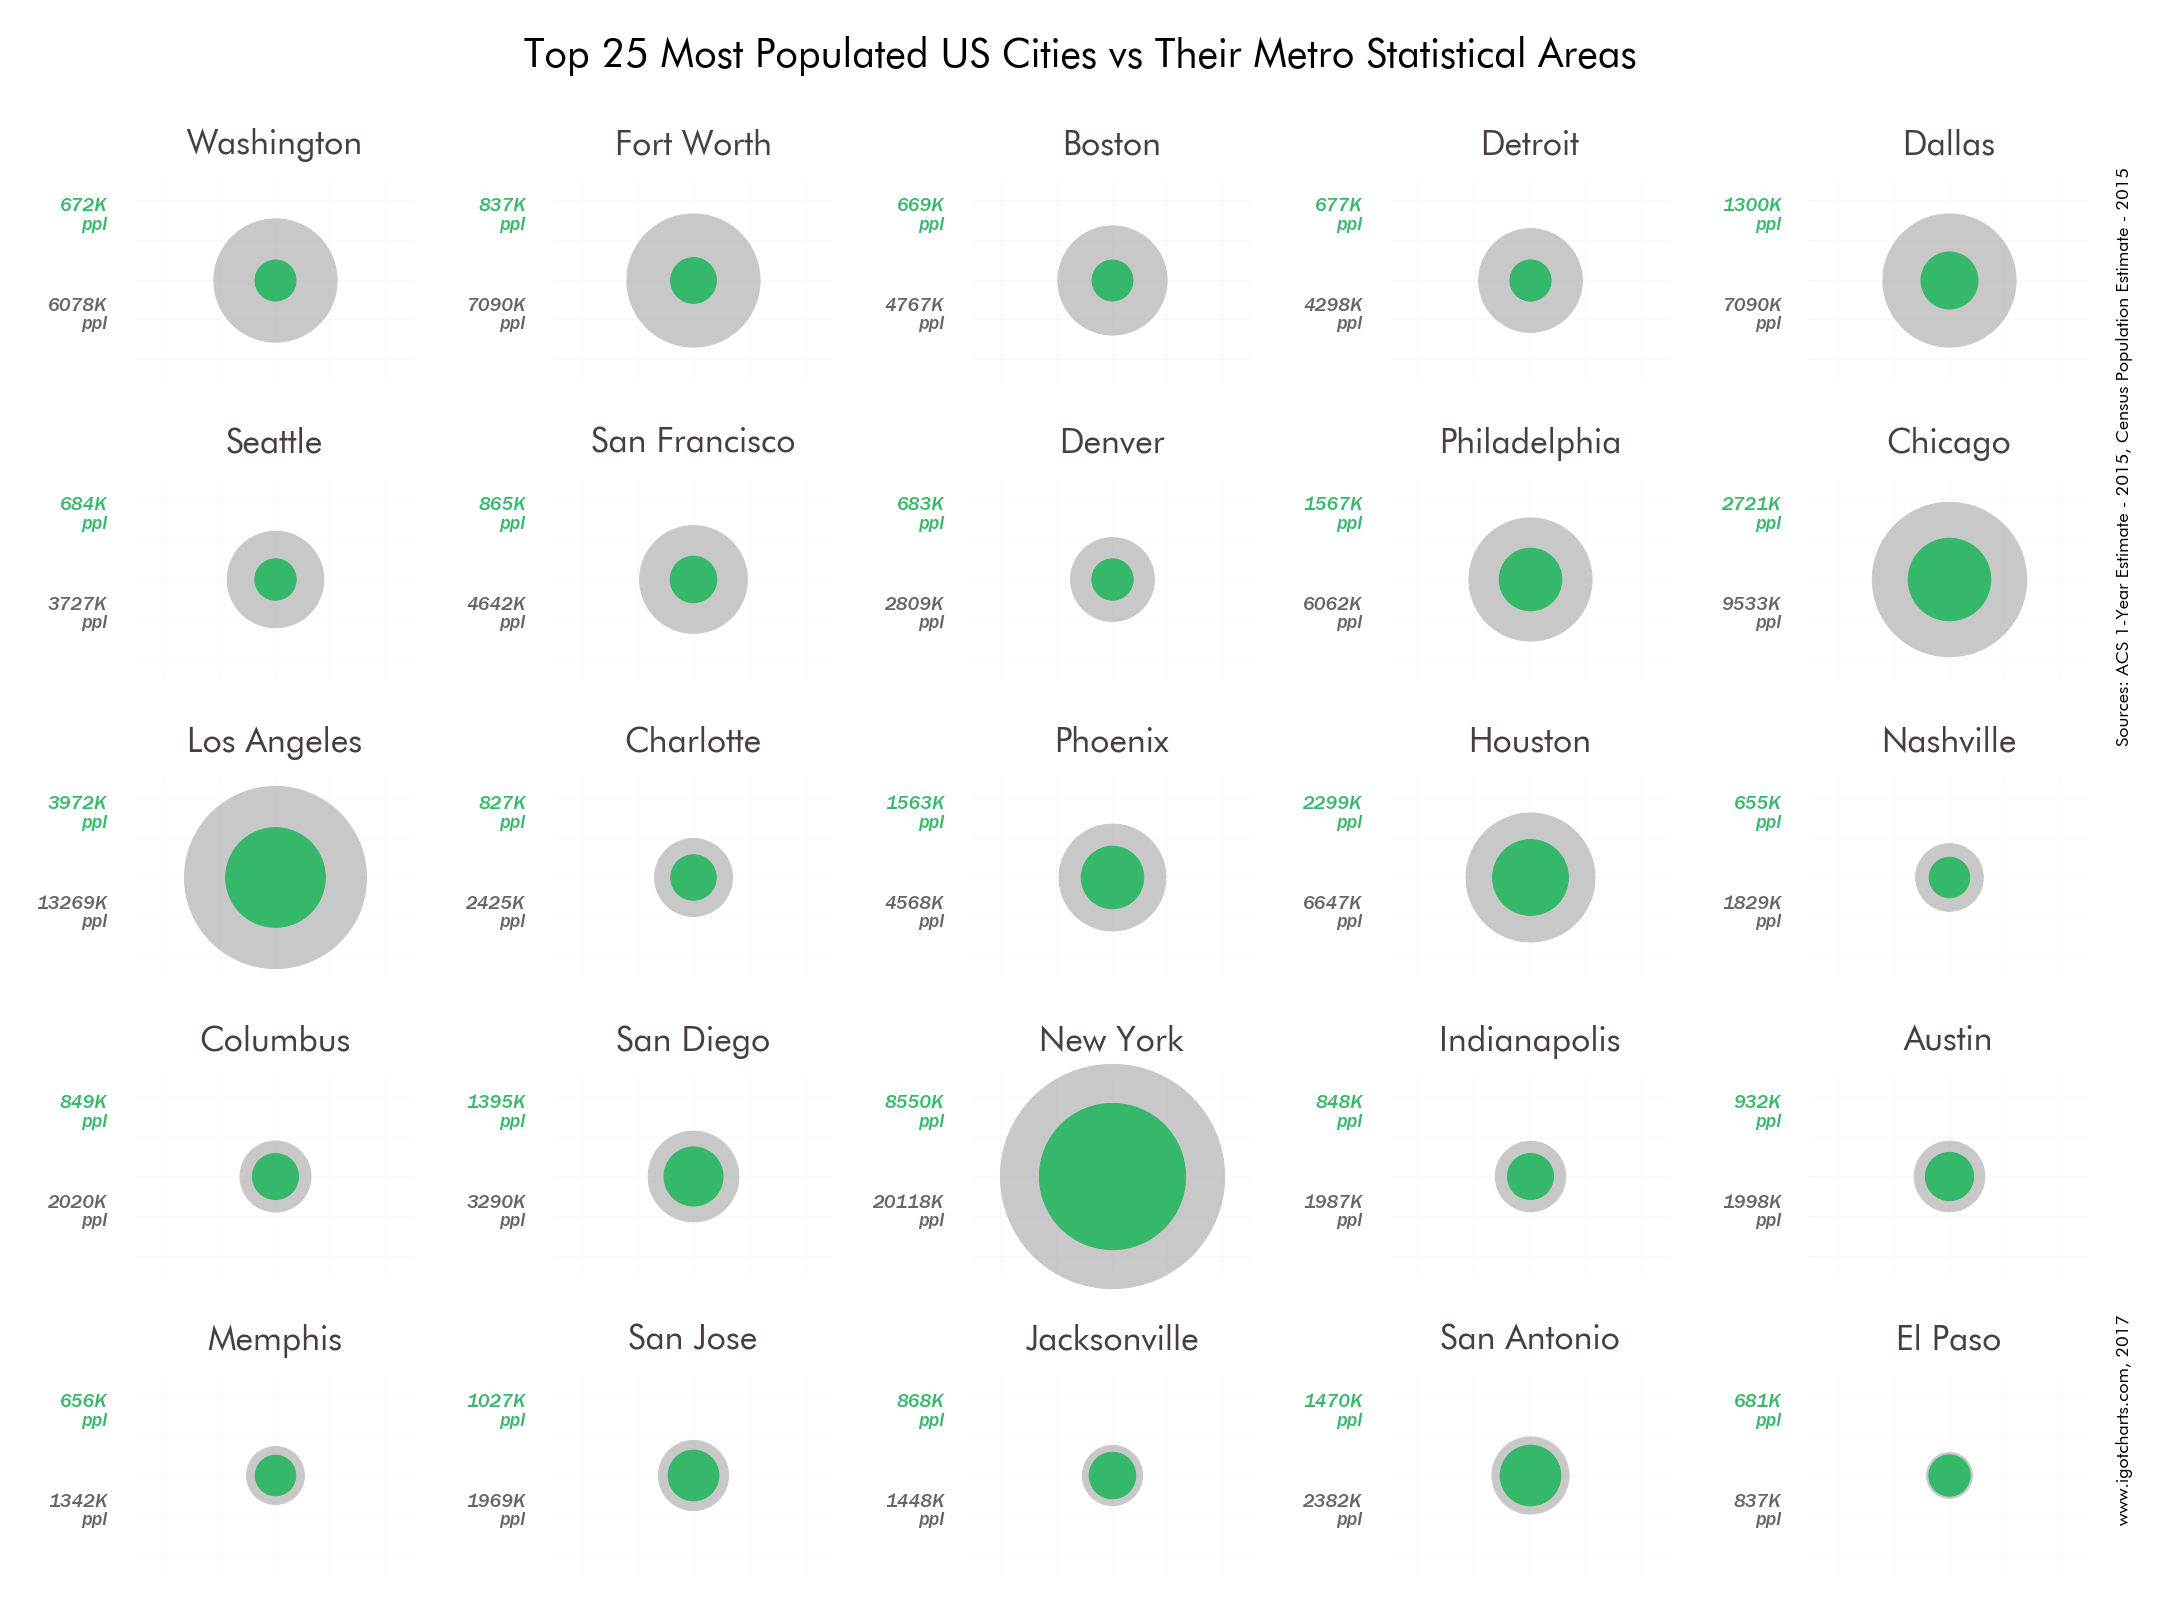

In [37]:
population_bubbles(population_25_metro_diff)